In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
data = pd.read_csv('address_clust.csv')
stats = pd.read_csv('address_stats.csv')
data = pd.merge(data,stats,on='address_id',how='right')
data.head(15)

,address_id,cluster_id,id,transaction_id,received,sent
0,71413451,1.0,135571000,29319673,1003590.0,0.0
1,71413451,1.0,135679242,29338157,0.0,1003590.0
2,71411914,1.0,135568134,29319205,1259370.0,0.0
3,71411914,1.0,135679245,29338157,0.0,1259370.0
4,71410369,1.0,135565307,29318455,21009000.0,0.0
5,71410369,1.0,135679241,29338157,0.0,21009000.0
6,71410100,1.0,135564903,29318320,103699500.0,0.0
7,71410100,1.0,135679247,29338157,0.0,103699500.0
8,71410040,1.0,135564812,29318289,1809000.0,0.0
9,71410040,1.0,135679239,29338157,0.0,1809000.0


In [11]:
data = data.sort_values(by=['transaction_id'])
data.head(15)

,address_id,cluster_id,id,transaction_id,received,sent
58475,46402336,NaN,87134765,19162323,0.0,1800000.0
58482,46529091,NaN,87134768,19162323,1821052.0,0.0
58481,45919235,NaN,87134766,19162323,0.0,1071052.0
30765,46529090,1.0,87134767,19162323,1000000.0,0.0
58476,46402336,NaN,87154708,19166856,900000.0,0.0
58490,46539634,NaN,87154707,19166856,90000.0,0.0
30766,46529090,1.0,87154706,19166856,0.0,1000000.0
58491,46553407,NaN,87187802,19174421,0.0,4800000.0
58503,46557249,NaN,87187803,19174421,4590000.0,0.0
30767,46529090,1.0,87187804,19174421,200000.0,0.0


In [12]:
data['cluster_id'] = data['cluster_id'].fillna(0)
data.head(20)

,address_id,cluster_id,id,transaction_id,received,sent
58475,46402336,0.0,87134765,19162323,0.0,1800000.0
58482,46529091,0.0,87134768,19162323,1821052.0,0.0
58481,45919235,0.0,87134766,19162323,0.0,1071052.0
30765,46529090,1.0,87134767,19162323,1000000.0,0.0
58476,46402336,0.0,87154708,19166856,900000.0,0.0
58490,46539634,0.0,87154707,19166856,90000.0,0.0
30766,46529090,1.0,87154706,19166856,0.0,1000000.0
58491,46553407,0.0,87187802,19174421,0.0,4800000.0
58503,46557249,0.0,87187803,19174421,4590000.0,0.0
30767,46529090,1.0,87187804,19174421,200000.0,0.0


In [13]:
data.transaction_id.nunique()

13753

 REZ_ij = сумма перевода из i-ого кластера в j-й

In [16]:
res_12 = (data.query("cluster_id==1 and sent!=0").merge(data.query("cluster_id==2 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())

In [34]:
print('1 Кластер перевел во 2й: ',np.sum(res_12)/(10**8),' BTC')

1 Кластер перевел во 2й:  10008.97445222  BTC


In [35]:
res_21 = (data.query("cluster_id==2 and sent!=0").merge(data.query("cluster_id==1 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())
print('2й Кластер перевел в 1й: ',np.sum(res_21)/(10**8),' BTC')

2й Кластер перевел в 1й:  10909.67771722  BTC


In [36]:
res_10 = (data.query("cluster_id==1 and sent!=0").merge(data.query("cluster_id==0 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())
print('1й Кластер перевел в 0й: ',np.sum(res_10)/(10**8),' BTC')

1й Кластер перевел в 0й:  3103.5941225  BTC


In [37]:
res_20 = (data.query("cluster_id==2 and sent!=0").merge(data.query("cluster_id==0 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())
print('2й Кластер перевел в 0й: ',np.sum(res_20)/(10**8),' BTC')

2й Кластер перевел в 0й:  2096.60958  BTC


In [38]:
res_01 = (data.query("cluster_id==0 and sent!=0").merge(data.query("cluster_id==1 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())
print('0й Кластер перевел в 1й: ',np.sum(res_01)/(10**8),' BTC')

0й Кластер перевел в 1й:  3478.95393454  BTC


In [39]:
res_02 = (data.query("cluster_id==0 and sent!=0").merge(data.query("cluster_id==2 and received!=0")[['received']],
                                                       left_on='sent',right_on='received')['sent'].tolist())
print('0й Кластер перевел в 2й: ',np.sum(res_02)/(10**8),' BTC')

0й Кластер перевел в 2й:  2182.57288  BTC


In [41]:
fee_1 = data.query("cluster_id==1").received.sum()-data.query("cluster_id==1").sent.sum()
print('Fee 1 кластера: ',fee_1/(10**8),' BTC')

Fee 1 кластера:  2.475371  BTC


In [42]:
fee_2 = data.query("cluster_id==2").received.sum()-data.query("cluster_id==2").sent.sum()
print('Fee 2 кластера: ',fee_2/(10**8),' BTC')

Fee 2 кластера:  -2.45212861  BTC


Text(0,0.5,'transaction_id')

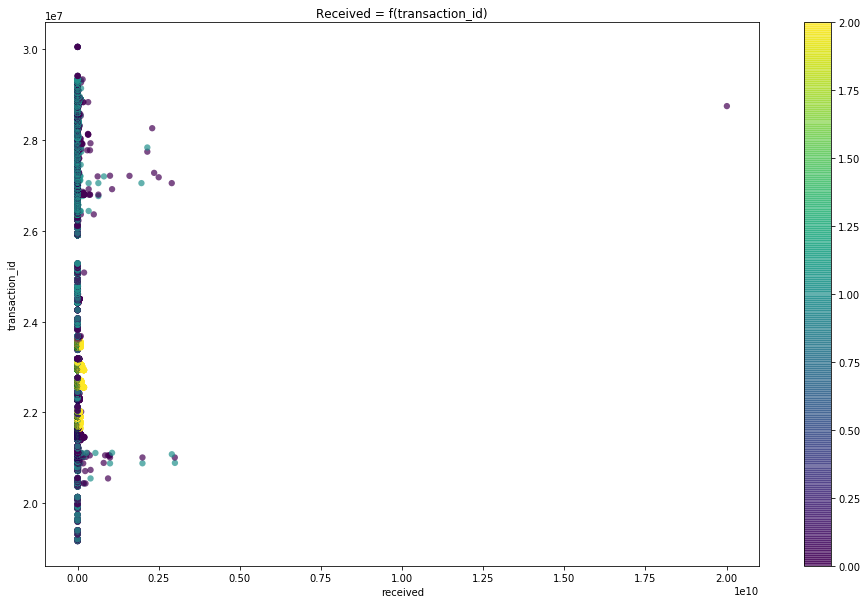

In [31]:
plt.figure(figsize=(16,10))
plt.scatter(data.received, data.transaction_id, c=data.cluster_id,edgecolor='none', alpha=0.7, s=40)
            
plt.colorbar()
plt.title('Received = f(transaction_id)')
plt.xlabel('received')
plt.ylabel('transaction_id')

Text(0,0.5,'transaction_id')

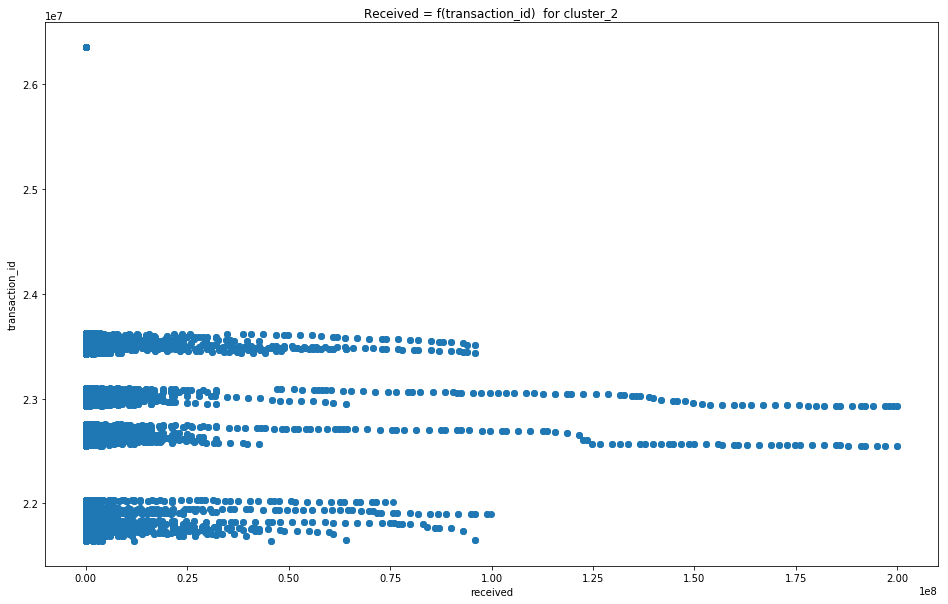

In [46]:
plt.figure(figsize=(16,10))
plt.scatter(data.query('cluster_id==2').received, data.query('cluster_id==2').transaction_id)
            
#plt.colorbar()
plt.title('Received = f(transaction_id)  for cluster_2')
plt.xlabel('received')
plt.ylabel('transaction_id')